# Breast Cancer Survival Prediction

## Overview

In this case study, I will be utilizing machine learning techniques to develop a predictive model for breast cancer survival. By training my model on a dataset that includes relevant patient information and survival outcomes, I aim to create a tool that can assist clinicians in assessing the prognosis of breast cancer patients. This could potentially aid in treatment decision-making and improve patient care.

**Please note that while machine learning can provide valuable insights, it should be used as a supplementary tool to support medical professionals rather than replace their expertise and judgment.**

## Dataset Overview

Below is informartion on the columns of the dataset of Breast Cancer Patiets. These patients have undergone surgery for treatment:

**Patient_ID:** ID of the patient\
**Age:** Age of the patient\
**Gender:**	Gender of the patient\
**Protein1, Protein2, Protein3, Protein4:** Expression levels\
**Tumor_Stage:** Breast cancer stage of the patient\
**Histology:** Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mutinous Carcinoma\
**ER status:** Positive / Negative\
**PR status:** Postive / Negative\
**HER2 status:** Positive / Negative\
**Surgery_type:** Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other\
**DateOfSurgery:** The date of the surgery\
**DateOfLast_Visit:** The date of the last visit of the patient\
**Patient_Status:** Alive / Dead

## Import Packages & Load Data

In [130]:
# Import Operational Packages
import pandas as pd
import numpy as np

# Import Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Other Packages
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [45]:
brca = pd.read_csv("/Users/thomashobson/Downloads/Data Analytic Projects/Healthcare/BRCA.csv") 

## Exploratory Data Analysis

In [46]:
brca.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


In [48]:
brca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [49]:
brca.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [50]:
brca.shape

(341, 16)

In [111]:
brca.dtypes

Patient_ID                    object
Age                          float64
Gender                        object
Protein1                     float64
Protein2                     float64
Protein3                     float64
Protein4                     float64
Tumour_Stage                  object
Histology                     object
ER status                     object
PR status                     object
HER2 status                   object
Surgery_type                  object
Date_of_Surgery       datetime64[ns]
Date_of_Last_Visit    datetime64[ns]
Patient_Status                object
dtype: object

In [59]:
brca.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [60]:
brca1 = brca.dropna(axis = 0)

In [61]:
brca.duplicated().sum()

6

In [62]:
brca.drop_duplicates(keep = 'first', inplace = True)

In [63]:
brca1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient_ID          317 non-null    object        
 1   Age                 317 non-null    float64       
 2   Gender              317 non-null    object        
 3   Protein1            317 non-null    float64       
 4   Protein2            317 non-null    float64       
 5   Protein3            317 non-null    float64       
 6   Protein4            317 non-null    float64       
 7   Tumour_Stage        317 non-null    object        
 8   Histology           317 non-null    object        
 9   ER status           317 non-null    object        
 10  PR status           317 non-null    object        
 11  HER2 status         317 non-null    object        
 12  Surgery_type        317 non-null    object        
 13  Date_of_Surgery     317 non-null    datetime64[ns]
 14 

**Findings**
* There are 341 rows and 16 columns in the dataset.
* All of the columns have missing values.
    * We have removed any missing values in the dataset.
* 5 out of 16 columns are float data types while the other are object / string data types
* We can see that there are 6 duplicated entries.
    * We have removed them from the dataset.
    * We have run a check to see if the rows have been removed that were duplicates and missing values.
* After all this has been done our dataset has been cleaned and ready for futher exploring to find relationships between data variables. 
* The data we have is:
    * 5 Numeric data variables
    * 11 Categorical data variables
* We had to change the data type of Dat_of_Surgery and Date_of_Last_Visit to datetime64[ns] instead of having them as objects.

## Discover relationships between variables

After finding out more about our dataset, we will now move to the next part of the EDA process and visualise our data to find any relationships in the data between different variables.

In [29]:
freq_table_patient_status = brca1.groupby(['Patient_Status']).size().reset_index(name = 'count')
freq_table_patient_status

,Patient_Status,count
0,Alive,255
1,Dead,62


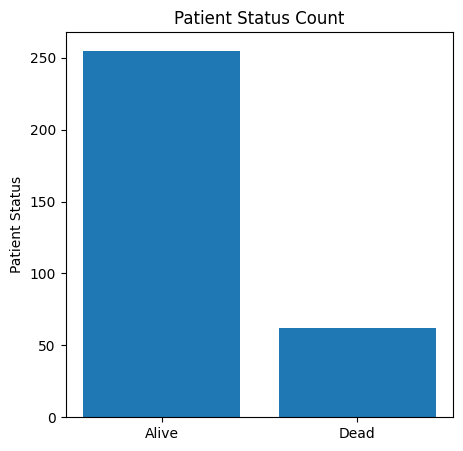

In [33]:
# Set the figure size
plt.figure(figsize = (5,5))
# Create a bar plot
plt.bar(freq_table_patient_status['Patient_Status'], freq_table_patient_status['count'])
# Set label for y-axis
plt.ylabel("Patient Status")
# Set title
plt.title('Patient Status Count')
# Display the plot
plt.show()

**Findings**

* Here we can see that of the 317 patients that were part of the dataset:
    * 255 have been reported to being alive
    * 62 have been reported to have died

In [36]:
freq_table_tumour_stage = brca1.groupby(['Tumour_Stage']).size().reset_index(name = 'count')
freq_table_tumour_stage

,Tumour_Stage,count
0,I,60
1,II,180
2,III,77


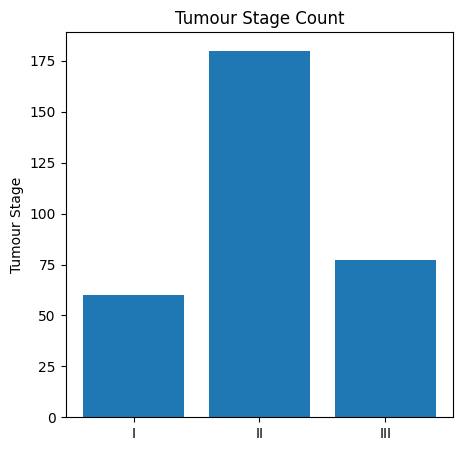

In [39]:
# Set the figure size
plt.figure(figsize = (5,5))
# Create a bar plot
plt.bar(freq_table_tumour_stage['Tumour_Stage'], freq_table_tumour_stage['count'])
# Set label for y-axis
plt.ylabel("Tumour Stage")
# Set title
plt.title('Tumour Stage Count')
# Display the plot
plt.show()

**Findings**

* 317 patients have been reported to be in the following Tumour Stages:
    * Stage 1 - 60 patients
    * Stage 2 - 180 patients
    * Stage 3 - 77 patients

<Figure size 700x700 with 0 Axes>

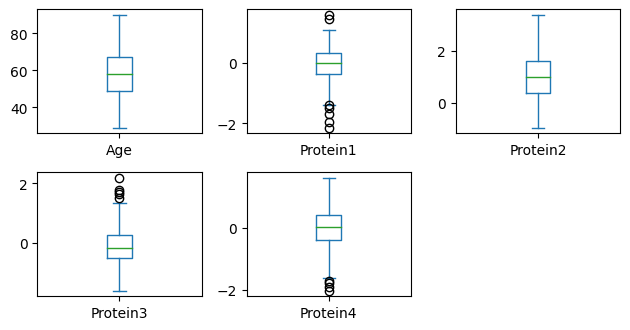

In [40]:
plt.figure(figsize = (7,7))
brca1.plot(kind = 'box', subplots = True, layout = (3,3))
plt.tight_layout()
plt.show()

**Findings**
* We look at the above boxplots to see if there is any outliers in the dataset.
* We notice that Protein 1, 3 and 4 all have outliers.
* We now need to decide what we will do with these outliers

<Axes: title={'center': 'stacked bar plot'}, xlabel='Tumour_Stage'>

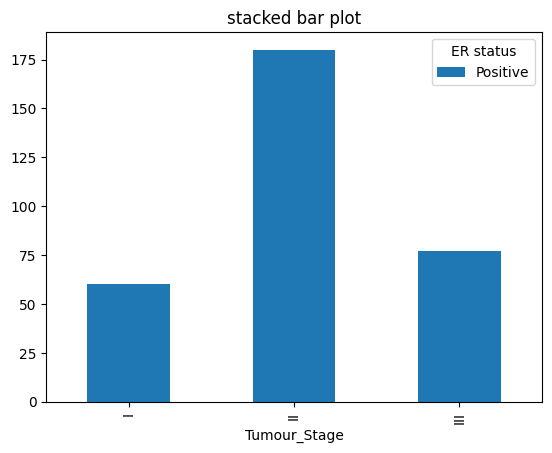

In [77]:
# Use pivot table to create stacked bar plot
stack = pd.pivot_table(brca1, index = ['Tumour_Stage'], columns = ['ER status'], values = 'Patient_ID', aggfunc = 'count')
# Plot the stacked plot
stack.plot.bar(title = 'stacked bar plot', stacked = True)

<Axes: title={'center': 'stacked bar plot'}, xlabel='Tumour_Stage'>

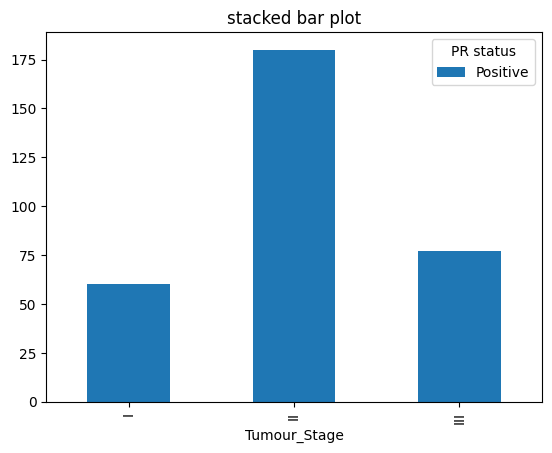

In [76]:
# Use pivot table to create stacked bar plot
stack = pd.pivot_table(brca1, index = ['Tumour_Stage'], columns = ['PR status'], values = 'Patient_ID', aggfunc = 'count')
# Plot the stacked plot
stack.plot.bar(title = 'stacked bar plot', stacked = True)

<Axes: title={'center': 'stacked bar plot'}, xlabel='Tumour_Stage'>

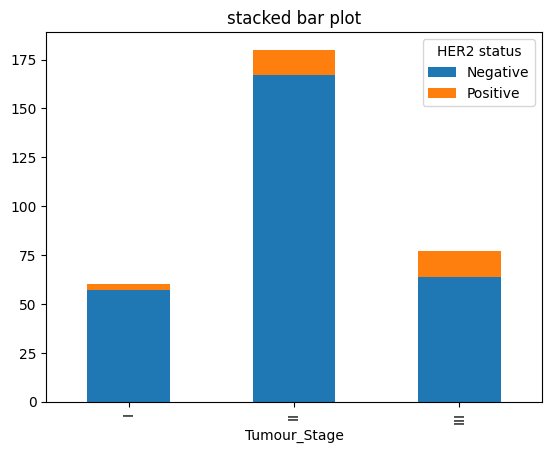

In [78]:
# Use pivot table to create stacked bar plot
stack = pd.pivot_table(brca1, index = ['Tumour_Stage'], columns = ['HER2 status'], values = 'Patient_ID', aggfunc = 'count')
# Plot the stacked plot
stack.plot.bar(title = 'stacked bar plot', stacked = True)

**Findings**
* Between the PR, ER and HER2 status' we can see that only the HER2 has negative and positive results
* People in stage 2 & 3 have more positve results than those in stage

In [86]:
# Select only numerical values
num_brca1 = brca1.select_dtypes(include = 'number')
# Correleation matrix
corr_matrix = num_brca1.corr()
# Display
corr_matrix

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000


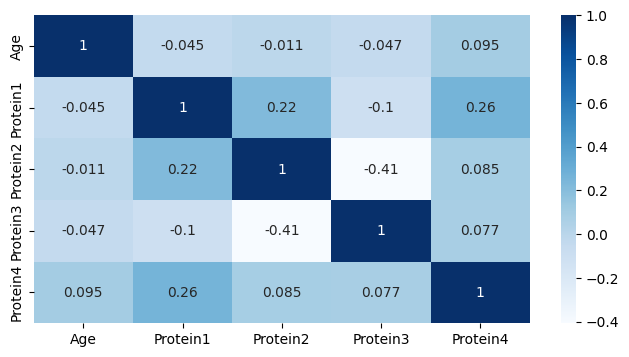

In [87]:
# Correlation between numeric values
# Set figure size
plt.figure(figsize = (8,4))
# Plot heat map to visualize correlation matrix
# 'annot = True' returns correlation values
# 'cmap' assigns colour to each cell
sns.heatmap(corr_matrix, annot = True,cmap = 'Blues')
# Display
plt.show()

**Findings**
* There is no significant correlation between the numerical values in the dataset

## Prediction Model 

In [135]:
# Changing the values from cateforical to numerical values
brca1["Tumour_Stage"] = brca1["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
brca1["Histology"] = brca1["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
brca1["ER status"] = brca1["ER status"].map({"Positive": 1})
brca1["PR status"] = brca1["PR status"].map({"Positive": 1})
brca1["HER2 status"] = brca1["HER2 status"].map({"Positive": 1, "Negative": 2})
brca1["Gender"] = brca1["Gender"].map({"MALE": 0, "FEMALE": 1})
brca1["Surgery_type"] = brca1["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(brca1.head())

    Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0  36.0       1  0.080353   0.42638   0.54715  0.273680             3   
1  43.0       1 -0.420320   0.57807   0.61447 -0.031505             2   
2  69.0       1  0.213980   1.31140  -0.32747 -0.234260             3   
3  56.0       1  0.345090  -0.21147  -0.19304  0.124270             2   
4  56.0       1  0.221550   1.90680   0.52045 -0.311990             2   

   Histology  ER status  PR status  HER2 status  Surgery_type Patient_Status  
0          1          1          1            2             2          Alive  
1          3          1          1            2             3           Dead  
2          1          1          1            2             1          Alive  
3          1          1          1            2             2          Alive  
4          1          1          1            2             1           Dead  


In [137]:
# Splitting data
x = np.array(brca1[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']])
y = np.array(brca1[['Patient_Status']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

In [142]:
# Train the model
model = SVC()
model.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [143]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

['Alive']


## Conclusion

In conclusion, the prediction model discussed above has the potential to assist in improving the survival rate for breast cancer patients, but it should be seen as a tool to support medical professionals rather than a sole determinant of treatment decisions.
It is important to remember that breast cancer is a complex disease, and numerous factors beyond the model's scope can influence treatment strategies and survival rates. Ultimately, the expertise and judgment of healthcare providers, along with patient-specific considerations, should always guide treatment decisions. The prediction model serves as an additional resource to inform these decisions, helping healthcare professionals tailor treatments and optimize outcomes for breast cancer patients.